# Project name- Churn Prediction

## ➔	Problem Understanding.
#### Project Description:
	The aim of this project is to predict whether a particular customer in a bank is going to leave or not. Such projects help to find out which        customers are more likely to buy some policies or whether it is beneficial for the company to sell some products to that particular customer or not.


### Import Lybraries

In [1]:
import pandas as pd   # pandas use fr data analysis ,data manipulation
import numpy as np    # numpy - Numerical python
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
data=pd.read_csv('Churn_data.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Rows and Columns

In [3]:
data.shape

(10127, 23)

In [4]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

### Removing Irrelevant Feature

In [5]:
data=data.iloc[:,:-2]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Data Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## Exploratory Data Analysis

In [7]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

#### Gender level with Attrition_Flag

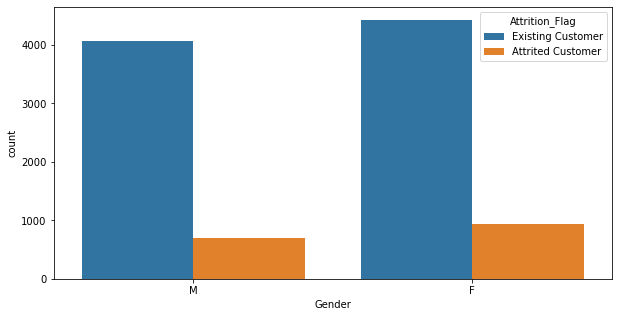

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Gender',hue='Attrition_Flag')
plt.show()

### Education with Attrition Flag

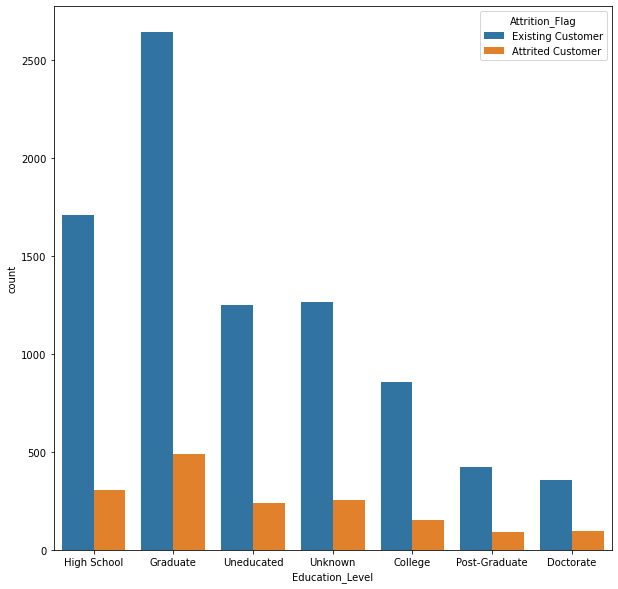

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(data=data,x='Education_Level',hue='Attrition_Flag')
plt.show()

### Marriatal status with Attrition_Flag

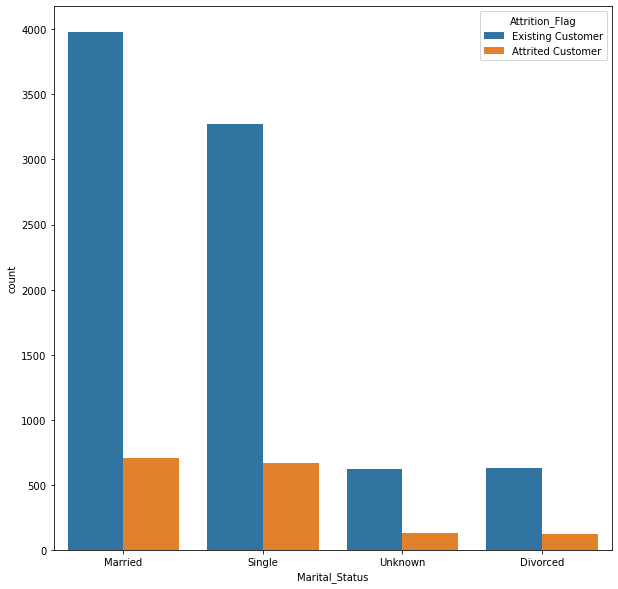

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x='Marital_Status',hue='Attrition_Flag',data=data)
plt.show()

### Income with Attrition flag

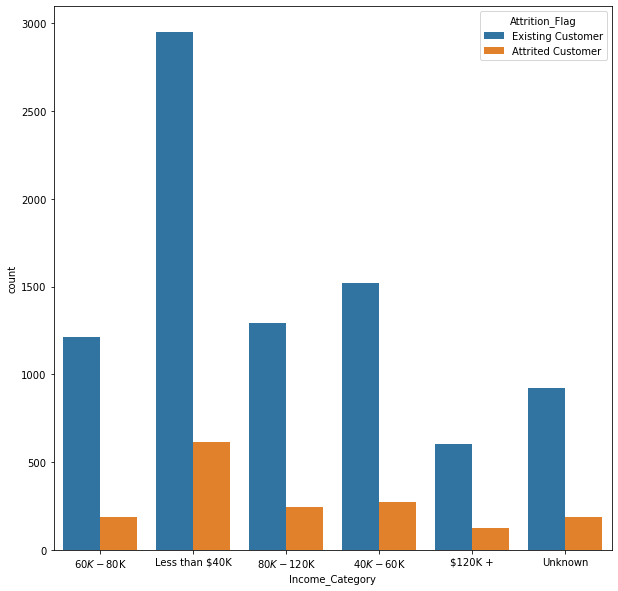

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x='Income_Category',hue='Attrition_Flag',data=data)
plt.show()

### Card with Attrition Flag

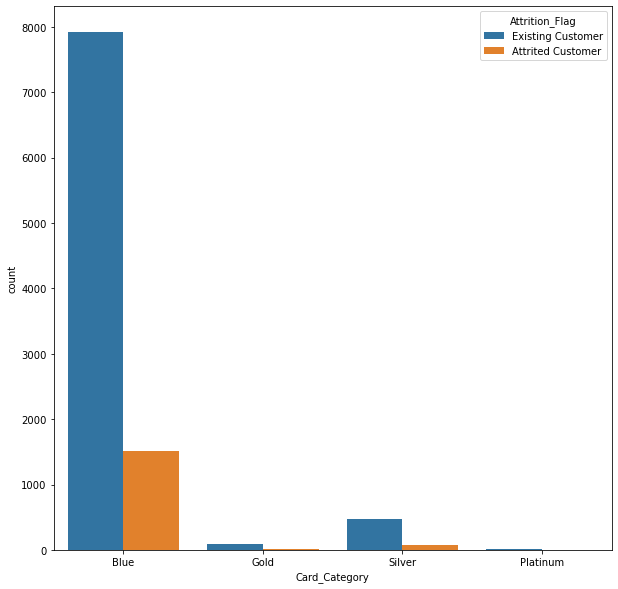

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(x='Card_Category',hue='Attrition_Flag',data=data)
plt.show()

### Percentage of Card category

In [13]:
data['Card_Category'].value_counts()/data['Card_Category'].shape[0]*100


Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: Card_Category, dtype: float64

### Dependent count with Attrition Flag

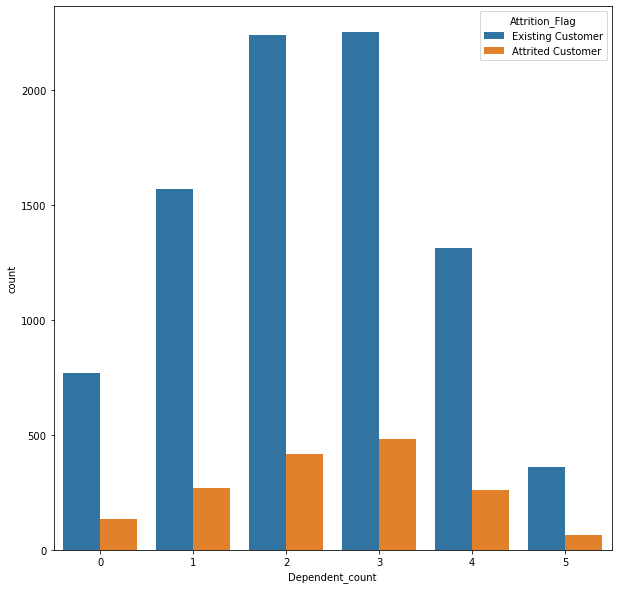

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x='Dependent_count',hue='Attrition_Flag',data=data)
plt.show()

In [15]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Months_on_book with Atvrition Flag

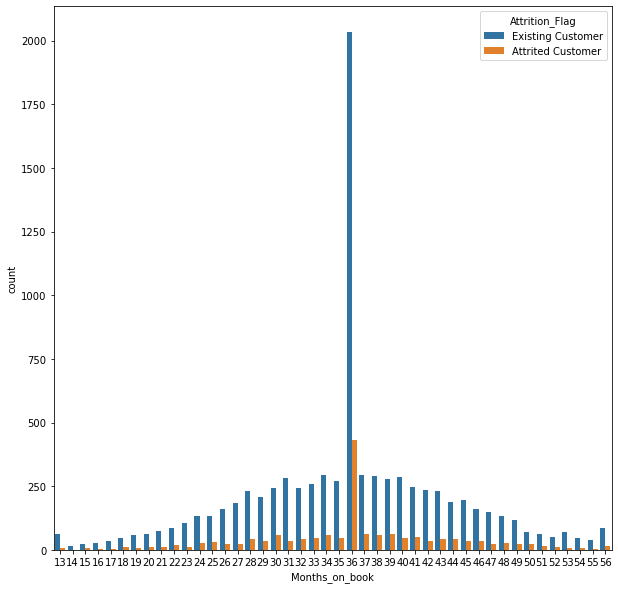

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x='Months_on_book',hue='Attrition_Flag',data=data)
plt.show()

### Total_Relationship_Count with Attrition Flag

In [17]:
# Converting CLIENTNUM variable to String variable
data['CLIENTNUM'].astype(str)

0        768805383
1        818770008
2        713982108
3        769911858
4        709106358
           ...    
10122    772366833
10123    710638233
10124    716506083
10125    717406983
10126    714337233
Name: CLIENTNUM, Length: 10127, dtype: object

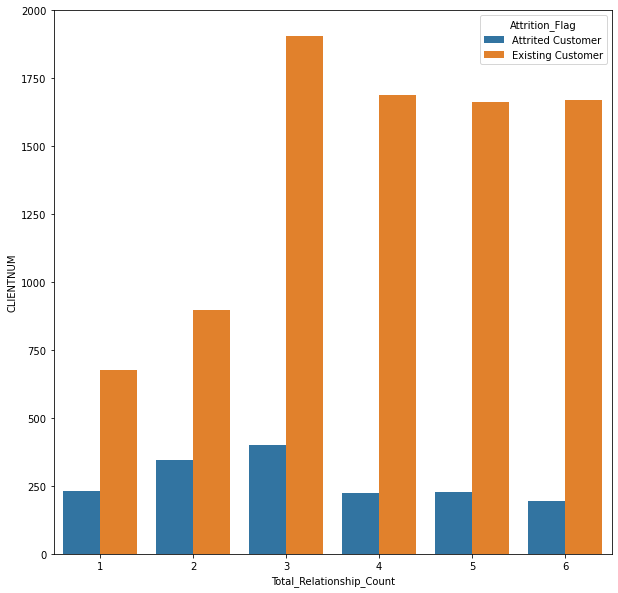

In [18]:
fig, ax=plt.subplots(figsize=(10,10),nrows=1,ncols=1)
sns.barplot(x=data.groupby(['Total_Relationship_Count','Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['Total_Relationship_Count'],
            y=data.groupby(['Total_Relationship_Count','Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['CLIENTNUM'],
            hue=data.groupby(['Total_Relationship_Count','Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['Attrition_Flag'])  
plt.show()           

### Contacts_Count_12_mon with Attrition Flag

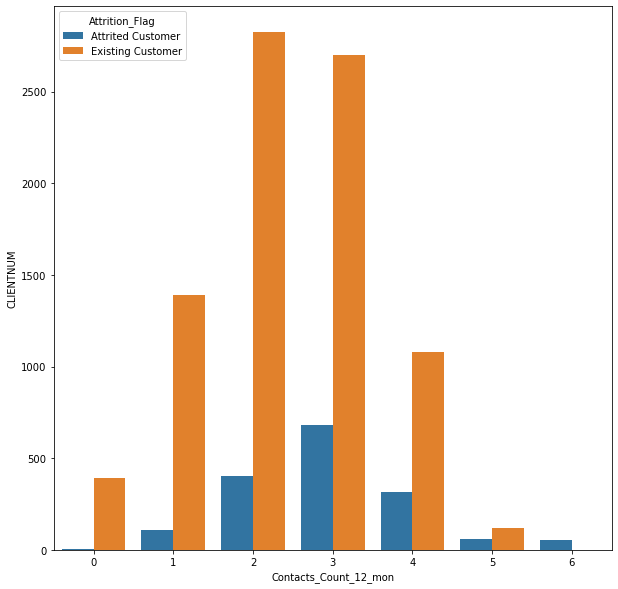

In [19]:
fig, ax=plt.subplots(figsize=(10,10),nrows=1,ncols=1)
sns.barplot(x=data.groupby(['Contacts_Count_12_mon','Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['Contacts_Count_12_mon'],
           y=data.groupby(['Contacts_Count_12_mon','Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['CLIENTNUM'],
           hue=data.groupby(['Contacts_Count_12_mon','Attrition_Flag']).agg({'CLIENTNUM':'count'}).reset_index()['Attrition_Flag'])
plt.show()
    

### Plotting Overlapped Histogram for Existing and Attrited customers to check the difference in Credit Limit

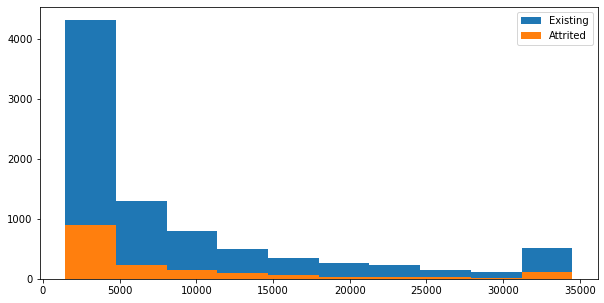

In [20]:
fig,ax=plt.subplots(figsize=(10,5),ncols=1,nrows=1)
ax.hist(data[data['Attrition_Flag']=='Existing Customer']['Credit_Limit'],label='Existing')
ax.hist(data[data['Attrition_Flag']=='Attrited Customer']['Credit_Limit'],label='Attrited')
ax.legend()
plt.show()

### Analysing Correlation using heatmap with some modifications into the plot

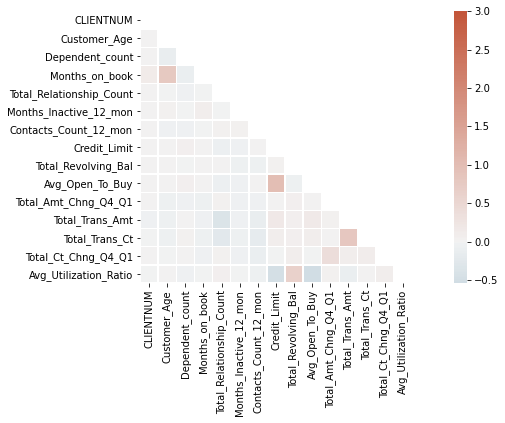

In [21]:
correlation=data.corr()
mask=np.triu(np.ones_like(correlation,dtype=bool))
f, ax=plt.subplots(figsize=(15,5))
cmap=sns.diverging_palette(230,20,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation,mask=mask,cmap=cmap,vmax=3,center=0,square=True,linewidths=.5)
plt.show()

## Data Preprocessing

In [22]:
# Deleting CLIENTNUM feature which is irrelevant in further analysis
df=data.drop(labels=['CLIENTNUM'],axis=1)

# Only cinsidering two types of cards,Blue and others.
df['Card_Category']=np.where(df['Card_Category']=='Blue','Blue','Other')
print(df['Card_Category'].value_counts(),'\n')

# Converting terget feature from string atvribute to numeric atvribute
df['Attrition_Flag']*np.where(df['Attrition_Flag']=='Existing Customer',0,1)
print(df['Attrition_Flag'].value_counts(),'\n')

df.head()

Blue     9436
Other     691
Name: Card_Category, dtype: int64 

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 



,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Converting Customer age into categorical feature

In [23]:
print('Mean of Customer Age:',np.mean(data['Customer_Age']),'\n')
print('Std Dev of Customer Age:',np.std(data['Customer_Age']),'\n' )

def ageTransformer(x):
    if x<=30:
        return 'LT_30'
    elif (x >= 31) & (x <=40):
        return 'Bet_31_40'
    elif(x>=41) & (x<=50):
        return 'Bet_41_50'
    elif(x>=51) & (x<= 60):
        return 'Bet 51_60'
    elif x> 60:
        return 'GT_60'
    
df['Customer_Age']=df['Customer_Age'].astype(int)
df['Customer_Age']=df['Customer_Age'].apply(lambda x: ageTransformer(x))
print(df['Customer_Age'].value_counts())

Mean of Customer Age: 46.32596030413745 

Std Dev of Customer Age: 8.016418208911816 

Bet_41_50    4652
Bet 51_60    2673
Bet_31_40    2132
GT_60         405
LT_30         265
Name: Customer_Age, dtype: int64


In [24]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,Bet_41_50,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,Bet_41_50,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,Bet 51_60,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,Bet_31_40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,Bet_31_40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Data preprocessing of categorical features and contineous feature seperately

In [25]:
df1=df.iloc[:,12]
df2=df.iloc[:,12:]
df2.head()

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [30]:
df1.head()

0    12691.0
1     8256.0
2     3418.0
3     3313.0
4     4716.0
Name: Credit_Limit, dtype: float64

### Feature scallng of Contineous Fature

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
std=StandardScaler()
df2=pd.DataFrame(std.fit_transform(df2),columns=df2.columns)

In [28]:
df2

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155
...,...,...,...,...,...,...,...,...
10122,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714
10123,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458
10124,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155
10125,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155


### Reducing no. of contineous features (Dimensionality reduction)

In [29]:
from sklearn.decomposition import PCA #(principal component analysis)
pcaObj=PCA(n_components=2,whiten=True,random_state=3)
df2=pd.DataFrame(pcaObj.fit_transform(df1),columns=['pc_1','pc_2'])

print(pcaObj.explained_variance_ratio_)
df2.head()

ValueError: Expected 2D array, got 1D array instead:
array=[12691.  8256.  3418. ...  5409.  5281. 10388.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### converting string categorical into numeric categorical features

In [32]:
print('shape of DF before transformation',df1.shape,'\n')
df2=pd.get_dummies(df1)

print('shape of DF after transformation',df2.shape,'\n')
df2.head()

shape of DF before transformation (10127,) 

shape of DF after transformation (10127, 6205) 



,1438.3,1439.0,1440.0,1441.0,1442.0,1443.0,1446.0,1449.0,1451.0,1452.0,...,34010.0,34058.0,34140.0,34162.0,34173.0,34198.0,34427.0,34458.0,34496.0,34516.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
